In [24]:
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import MathsUtilities as MUte
%matplotlib inline

In [25]:
Colors = ['darkblue',           
'darkcyan',           
'darkgoldenrod',      
'darkgray',           
'darkgreen',          
'darkkhaki',          
'darkmagenta',        
'darkolivegreen',     
'darkorange',         
'darkorchid',         
'darkred',            
'darkviolet',
'blue',           
'cyan',           
'goldenrod',      
'gray',           
'green',
'black']
Markers = ['o','s','^']

In [26]:
con = sqlite3.connect('D:\\APSIMX2\\Prototypes\\Lucerne\\LucerneValidation.db')

In [27]:
PredictedObserved = pd.read_sql("Select * from PredictedObserved",
                        con)
#PredictedObserved.set_index(['SimulationID','Clock.Today'],inplace=True)

In [28]:
Report = pd.read_sql("Select * from Report", con)
#Report.set_index(['SimulationID','Clock.Today'],inplace=True)
#Report.to_pickle('Report.pkl')

In [29]:
#Report.columns
Siumlations=pd.read_sql('Select * from _Simulations',con)

In [30]:
Siumlations

,ID,Name,FolderName
0,1,Iversen_8Waterdry,New Zealand
1,2,Iversen_8Waterirr,New Zealand
2,3,Iversen_9SowingDateSD1Waterdry,New Zealand
3,4,HudsonDefoliation,
4,5,TrenqueLauquenDefoliation,
5,6,BalcarceDefoliation,
6,7,Iversen_91DefoliationLL,New Zealand
7,8,Iversen_91DefoliationLS,New Zealand
8,9,Iversen_91DefoliationSL,New Zealand
9,10,Iversen_91DefoliationSS,New Zealand


In [31]:
Baseline=pd.read_pickle('Report.pkl')

In [32]:
PredictedObserved.columns

Index(['CheckpointID', 'Observed.CheckpointID', 'Predicted.CheckpointID',
       'SimulationID', 'Clock.Today', 'Observed.StemWt', 'Predicted.StemWt',
       'Pred-Obs.StemWt', 'Observed.LeafWt', 'Predicted.LeafWt',
       'Pred-Obs.LeafWt', 'Observed.RootWt', 'Predicted.RootWt',
       'Pred-Obs.RootWt', 'Observed.RootN', 'Predicted.RootN',
       'Pred-Obs.RootN', 'Observed.LeafN', 'Predicted.LeafN', 'Pred-Obs.LeafN',
       'Observed.StemN', 'Predicted.StemN', 'Pred-Obs.StemN', 'Observed.ET',
       'Predicted.ET', 'Pred-Obs.ET', 'Observed.NodeNumber',
       'Predicted.NodeNumber', 'Pred-Obs.NodeNumber', 'Observed.LAI',
       'Predicted.LAI', 'Pred-Obs.LAI', 'Observed.Height', 'Predicted.Height',
       'Pred-Obs.Height', 'Observed.ShootWt', 'Predicted.ShootWt',
       'Pred-Obs.ShootWt'],
      dtype='object')

In [33]:
Factors = pd.read_sql("Select * from _Factors",
                        con)
#ValidationIndex = Factors.drop_duplicates(subset=['SimulationName']).loc[:,Factors.columns.isin(['SimulationID','ExperimentName','SimulatinName','FolderName'])]
Experiments=Factors.loc[Factors.FactorName == "Experiment","FactorValue"].drop_duplicates().tolist()

In [34]:
Factors

,CheckpointID,SimulationID,ExperimentName,FolderName,FactorName,FactorValue
0,1,2,Iversen_8,New Zealand,Water,irr
1,1,1,Iversen_8,New Zealand,Water,dry
2,1,3,Iversen_9,New Zealand,SowingDate,SD1
3,1,3,Iversen_9,New Zealand,Water,dry
4,1,25,Iversen_9,New Zealand,SowingDate,SD2
5,1,25,Iversen_9,New Zealand,Water,dry
6,1,26,Iversen_9,New Zealand,SowingDate,SD3
7,1,26,Iversen_9,New Zealand,Water,dry
8,1,27,Iversen_9,New Zealand,SowingDate,SD4
9,1,27,Iversen_9,New Zealand,Water,dry


In [35]:
ExperimentIndex=Factors.loc[Factors.FactorName=="Experiment",["SimulationID","FactorValue"]].drop_duplicates()
ExperimentIndex.set_index("SimulationID", inplace=True)
ExperimentIndex.columns=["Experiment"]

In [36]:
SimulationIndex=Factors.loc[Factors.FactorName=="SimulationName",["SimulationID","FactorValue"]].drop_duplicates()
SimulationIndex.set_index("SimulationID", inplace=True)
SimulationIndex.columns=["SimulationName"]

In [37]:
IDIndex=pd.concat([ExperimentIndex,SimulationIndex], axis=1)

In [38]:
def MakeLabel(RegStats):
    #text = RegStats.Name + '  n = ' + str(RegStats.n)
    text = '\ny = ' + '%.2f'%RegStats.Intercept + '(se ' + '%.2f'%RegStats.SEintercept + ') + ' + '%.2f'%RegStats.Slope + '(se ' + '%.2f'%RegStats.SEslope + ') x' 
    text += '\n$r^2$ =' + '%.2f'%RegStats.R2 + ' RMSE = ' + '%.2f'%RegStats.RMSE +' NSE = ' + '%.2f'%RegStats.NSE
    text += '\nME = ' + '%.2f'%RegStats.ME + ' MAE = ' + '%.2f'%RegStats.MAE
    text += '\nn = ' + str(RegStats.n)
    return text

In [39]:
Includes=['Iversen_8','Iversen_9', 'Iversen_91','Iversen_121']
       

In [40]:
IDIndex.loc[IDIndex.Experiment.isin(Includes), 'SimulationName'].values

array([], dtype=object)

In [41]:
InculdeTreatments= [ 'Iversen_8Waterirr',
       'Iversen_9SowingDateSD1Waterirr', 'Iversen_9SowingDateSD2Waterirr',
       'Iversen_9SowingDateSD3Waterirr', 'Iversen_9SowingDateSD4Waterirr',
       'Iversen_9SowingDateSD6Waterirr', 'Iversen_9SowingDateSD7Waterirr',
       'Iversen_91DefoliationLL', 'Iversen_91DefoliationSL',
       'Iversen_91DefoliationSS', 'Iversen_91DefoliationLS',
       'Iversen_121DefoliationSSFDFD2', 'Iversen_121DefoliationLLFDFD2',
       'Iversen_121DefoliationHHFDFD2', 'Iversen_121DefoliationSSFDFD5',
       'Iversen_121DefoliationLLFDFD5', 'Iversen_121DefoliationHHFDFD5',
       'Iversen_121DefoliationSSFDFD10', 'Iversen_121DefoliationLLFDFD10',
       'Iversen_121DefoliationHHFDFD10']

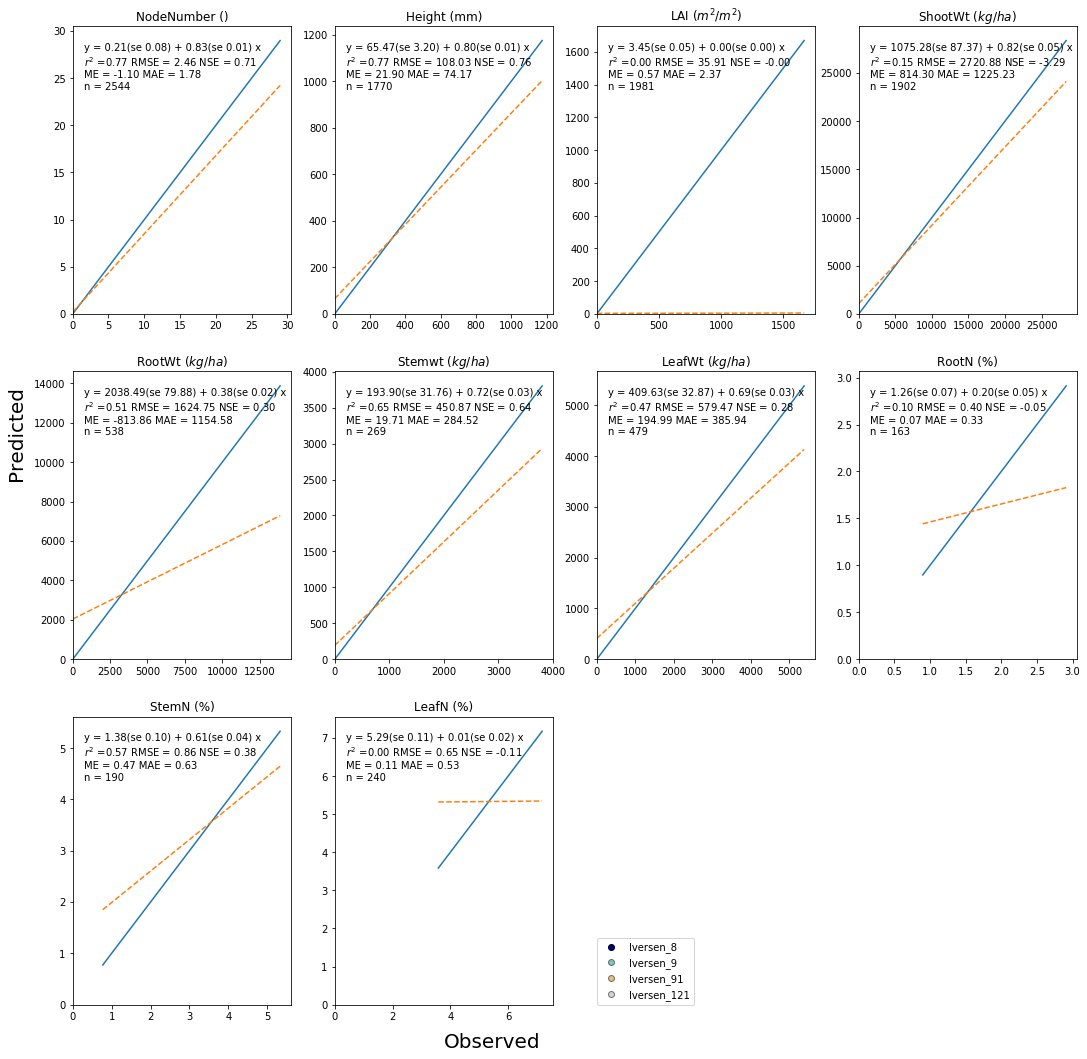

In [42]:
Graph = plt.figure(figsize=(18,18))
Variables = ['NodeNumber','Height','LAI','ShootWt','RootWt','StemWt','LeafWt','RootN','StemN','LeafN']
PerformStats = pd.DataFrame(index=Variables,columns=['NSE','R2','RMSE','ME','MAE'])
Units = ['','mm','$m^2/m^2$','$kg/ha$','$kg/ha$','$kg/ha$','$kg/ha$','%','%','%']
Names = ['NodeNumber','Height','LAI','ShootWt','RootWt','Stemwt','LeafWt','RootN','StemN','LeafN']
Pos = 1

for Var in Variables:
    NaNFilter = np.isnan(PredictedObserved.loc[:,'Predicted.'+Var]) | np.isnan(PredictedObserved.loc[:,'Observed.'+Var])    
    IaNFilter = ~NaNFilter
    Obs = PredictedObserved.loc[:,'Observed.'+Var].loc[IaNFilter].values
    Pred = PredictedObserved.loc[:,'Predicted.'+Var].loc[IaNFilter].values
    ax = Graph.add_subplot(3,4,Pos)
    MarPos = 0
    ColPos = 0
    alp=1.0
    for Exp in ['Iversen_8','Iversen_9', 'Iversen_91','Iversen_121']:
        Sims = IDIndex.loc[(IDIndex.Experiment == Exp)&(IDIndex.SimulationName.isin(InculdeTreatments))].index.values
        ExpObs = PredictedObserved.loc[PredictedObserved.SimulationID.isin(Sims),'Observed.'+Var].loc[IaNFilter].values
        ExpPred = PredictedObserved.loc[PredictedObserved.SimulationID.isin(Sims),'Predicted.'+Var].loc[IaNFilter].values
        plt.plot(ExpObs,ExpPred,Markers[MarPos],color = Colors[ColPos], label= Exp,ms=3,alpha=alp, mec='k',mew=1)
        ColPos +=1
        alp=0.5
        if ColPos== 18:
            ColPos=0
            MarPos += 1
    uplim = max(Obs.max(),Pred.max())*1.1
    lowlim = min(Obs.min(),Pred.min())*0.95
    plt.title(Names[Pos-1] + ' (' + Units[Pos-1] + ')')
    plt.ylim(0,uplim)
    plt.xlim(0,uplim)
    plt.plot([lowlim,uplim*.95],[lowlim,uplim*.95],'-')
    RegStats = MUte.MathUtilities.CalcRegressionStats(Var,Pred,Obs)
    LabelText = MakeLabel(RegStats)
    plt.text(uplim*0.05,uplim*.78,LabelText)
    #Fit linear regression to current series and store slope and intercept in dataframe
    ModFit = sm.regression.linear_model.OLS(Pred,  # Y variable
                                        sm.add_constant(Obs), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
    RegFit = ModFit.fit();  # fit models parameters
    Slope = RegFit.params[1] 
    Intercept = RegFit.params[0]
    Xs = [lowlim,uplim*.95]
    Ys = [Intercept + Xs[0]*Slope,Intercept + Xs[1]*Slope]
    plt.plot(Xs,Ys,'--')
    PerformStats.loc[Var,'NSE'] = RegStats.NSE
    PerformStats.loc[Var,'R2'] = RegStats.R2
    PerformStats.loc[Var,'RMSE'] = RegStats.RMSE
    PerformStats.loc[Var,'ME'] = RegStats.ME
    PerformStats.loc[Var,'MAE'] = RegStats.MAE
    Pos +=1
plt.text(0.5,-0.15,'Observed',fontsize=20,transform=ax.transAxes)
plt.text(-1.5,2.1,'Predicted',fontsize=20,rotation=90,transform=ax.transAxes)
plt.legend(loc = (1.2,0),ncol=1,numpoints=1,markerscale=2)

In [43]:
#PredictedObserved
#Baseline
PredictedObserved_Baseline= pd.merge(PredictedObserved,Baseline,how='right',on=['SimulationID', 'Clock.Today'])

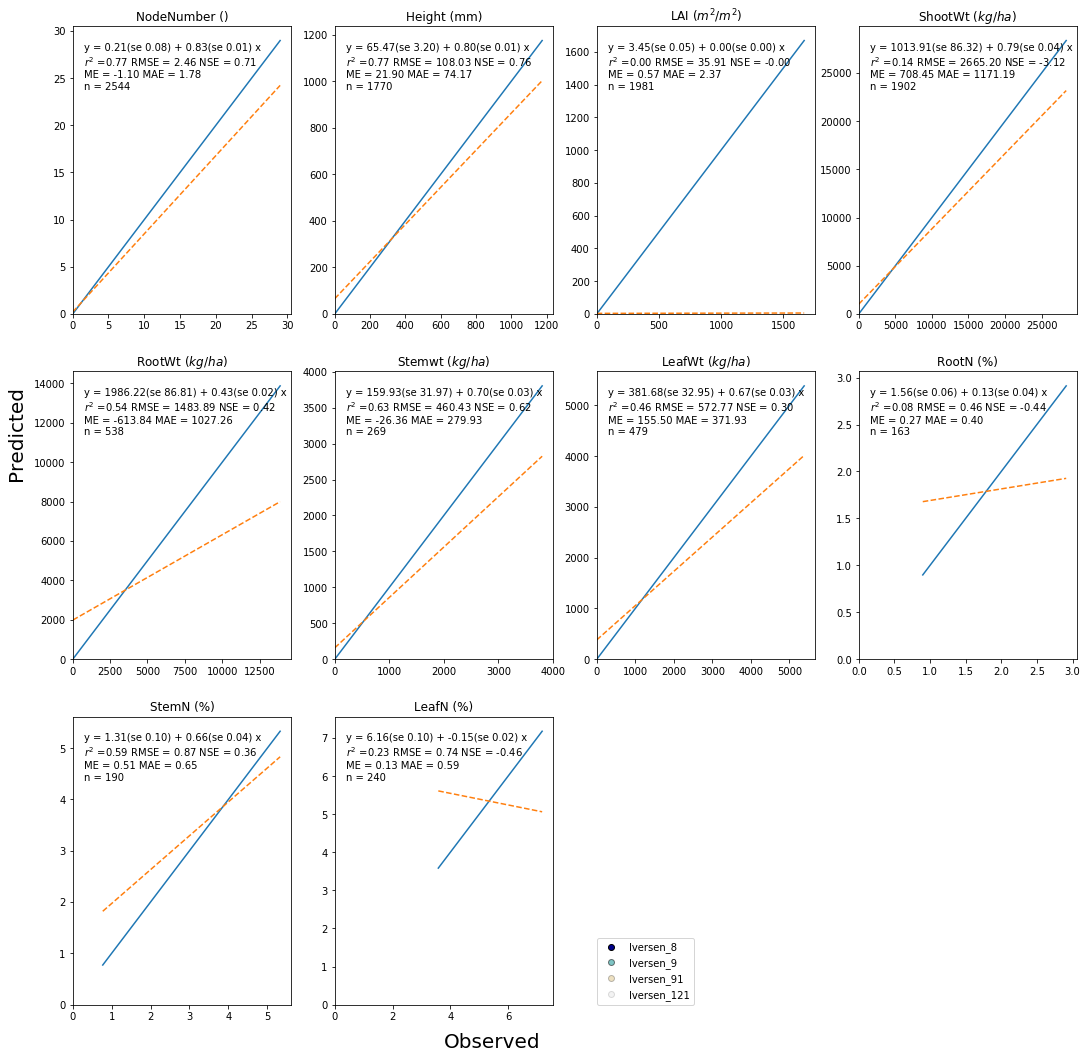

In [44]:
###Baseline graph and stats
Graph = plt.figure(figsize=(18,18))
Variables = ['NodeNumber','Height','LAI','ShootWt','RootWt','StemWt','LeafWt','RootN','StemN','LeafN']
BaselineStats = pd.DataFrame(index=Variables,columns=['NSE','R2','RMSE','ME','MAE'])
Units = ['','mm','$m^2/m^2$','$kg/ha$','$kg/ha$','$kg/ha$','$kg/ha$','%','%','%']
Names = ['NodeNumber','Height','LAI','ShootWt','RootWt','Stemwt','LeafWt','RootN','StemN','LeafN']
Pos = 1

for Var in Variables:
    NaNFilter = np.isnan(PredictedObserved_Baseline.loc[:,Var]) | np.isnan(PredictedObserved_Baseline.loc[:,'Observed.'+Var])    
    IaNFilter = ~NaNFilter
    Obs = PredictedObserved_Baseline.loc[:,'Observed.'+Var].loc[IaNFilter].values
    Pred = PredictedObserved_Baseline.loc[:,Var].loc[IaNFilter].values
    ax = Graph.add_subplot(3,4,Pos)
    MarPos = 0
    ColPos = 0
    alp=1.0
    for Exp in ['Iversen_8','Iversen_9', 'Iversen_91','Iversen_121']:
        Sims = IDIndex.loc[(IDIndex.Experiment == Exp)&(IDIndex.SimulationName.isin(InculdeTreatments))].index.values
        ExpObs =PredictedObserved_Baseline.loc[PredictedObserved_Baseline.SimulationID.isin(Sims),'Observed.'+Var].loc[IaNFilter].values
        ExpPred = PredictedObserved_Baseline.loc[PredictedObserved_Baseline.SimulationID.isin(Sims),Var].loc[IaNFilter].values
        plt.plot(ExpObs,ExpPred,Markers[MarPos],color = Colors[ColPos], label= Exp,ms=3,alpha=alp, mec='k',mew=1)
        ColPos +=1
        alp*=0.5
        if ColPos== 18:
            ColPos=0
            MarPos += 1
    uplim = max(Obs.max(),Pred.max())*1.1
    lowlim = min(Obs.min(),Pred.min())*0.95
    plt.title(Names[Pos-1] + ' (' + Units[Pos-1] + ')')
    plt.ylim(0,uplim)
    plt.xlim(0,uplim)
    plt.plot([lowlim,uplim*.95],[lowlim,uplim*.95],'-')
    RegStats = MUte.MathUtilities.CalcRegressionStats(Var,Pred,Obs)
    LabelText = MakeLabel(RegStats)
    plt.text(uplim*0.05,uplim*.78,LabelText)
    #Fit linear regression to current series and store slope and intercept in dataframe
    ModFit = sm.regression.linear_model.OLS(Pred,  # Y variable
                                        sm.add_constant(Obs), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
    RegFit = ModFit.fit();  # fit models parameters
    Slope = RegFit.params[1] 
    Intercept = RegFit.params[0]
    Xs = [lowlim,uplim*.95]
    Ys = [Intercept + Xs[0]*Slope,Intercept + Xs[1]*Slope]
    plt.plot(Xs,Ys,'--')
    BaselineStats.loc[Var,'NSE'] = RegStats.NSE
    BaselineStats.loc[Var,'R2'] = RegStats.R2
    BaselineStats.loc[Var,'RMSE'] = RegStats.RMSE
    BaselineStats.loc[Var,'ME'] = RegStats.ME
    BaselineStats.loc[Var,'MAE'] = RegStats.MAE
    Pos +=1
plt.text(0.5,-0.15,'Observed',fontsize=20,transform=ax.transAxes)
plt.text(-1.5,2.1,'Predicted',fontsize=20,rotation=90,transform=ax.transAxes)
plt.legend(loc = (1.2,0),ncol=1,numpoints=1,markerscale=2)

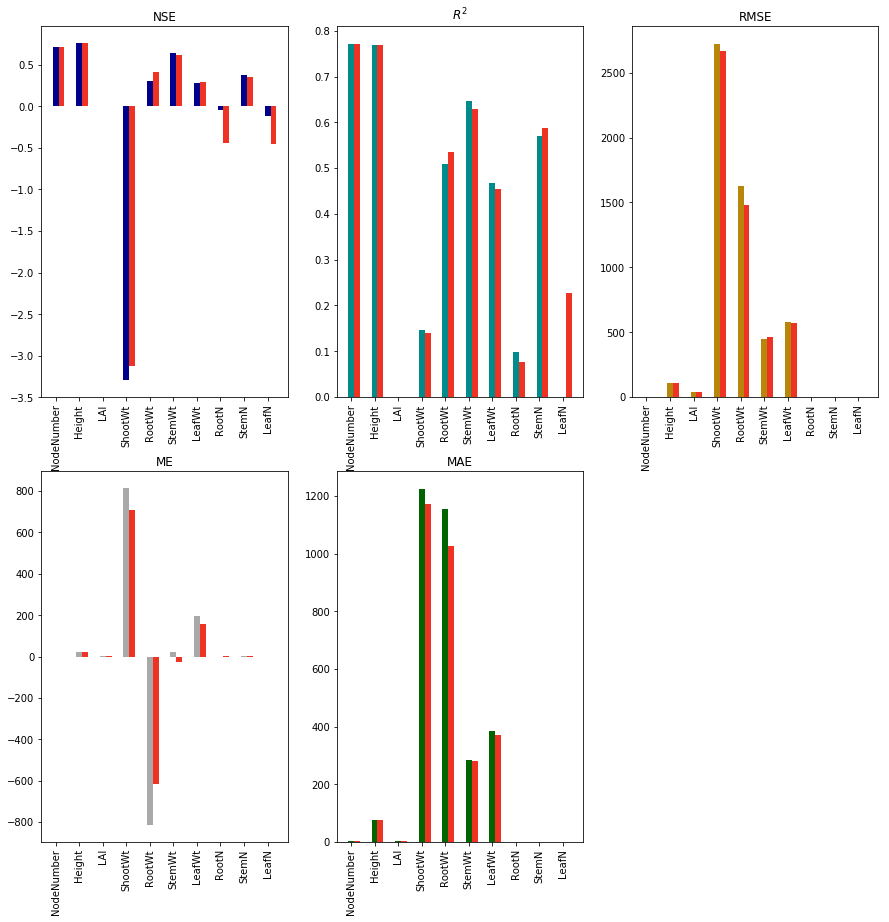

In [45]:
Graph = plt.figure(figsize=(15,15))
StatsVariables = ['NSE','R2','RMSE','ME','MAE']
Names = ['NSE','$R^2$','RMSE','ME','MAE']
labels = PerformStats.index.values
Pos = 1
ColPos = 0
width = 0.25 
for StatsVar in StatsVariables:
    x = PerformStats.loc[:,StatsVar].values
    Baseline_x = BaselineStats.loc[:,StatsVar].values
    pos = list(range(len(BaselineStats[StatsVar]))) 
    ax= Graph.add_subplot(2,3,Pos)
    plt.bar(pos, x, width, color = Colors[ColPos])
    plt.bar([p + width for p in pos], Baseline_x, width, color ='#EE3224')
    plt.title(Names[Pos-1])
    ColPos +=1
    Pos +=1  
    plt.xticks(pos,labels)
    plt.tick_params(axis='x', rotation=90)

In [46]:
Report.set_index(['SimulationID','Clock.Today'],inplace=True)

In [47]:
for pair in PredictedObserved.index:
    SimID =  PredictedObserved.loc[pair,'SimulationID']
    ObsDate = PredictedObserved.loc[pair,'Clock.Today']
    PredictedObserved.loc[pair,'DSWS'] = Report.loc[(SimID,ObsDate),'Weather.DaysSinceWinterSolstice']
    PredictedObserved.loc[pair,'DReg'] = Report.loc[(SimID,ObsDate),'Lucerne.Phenology.DaysAfterCutting']
    PredictedObserved.loc[pair,'TTAC'] = Report.loc[(SimID,ObsDate),'Lucerne.Phenology.ThermalTimeAfterCutting']

C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  ret = ax.set_ylim(*args, **kwargs)
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  ret = ax.set_ylim(*args, **kwargs)
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  ret = ax.set_ylim(*args, **kwargs)
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  ret = ax.set_ylim(*args, **kwargs)
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting

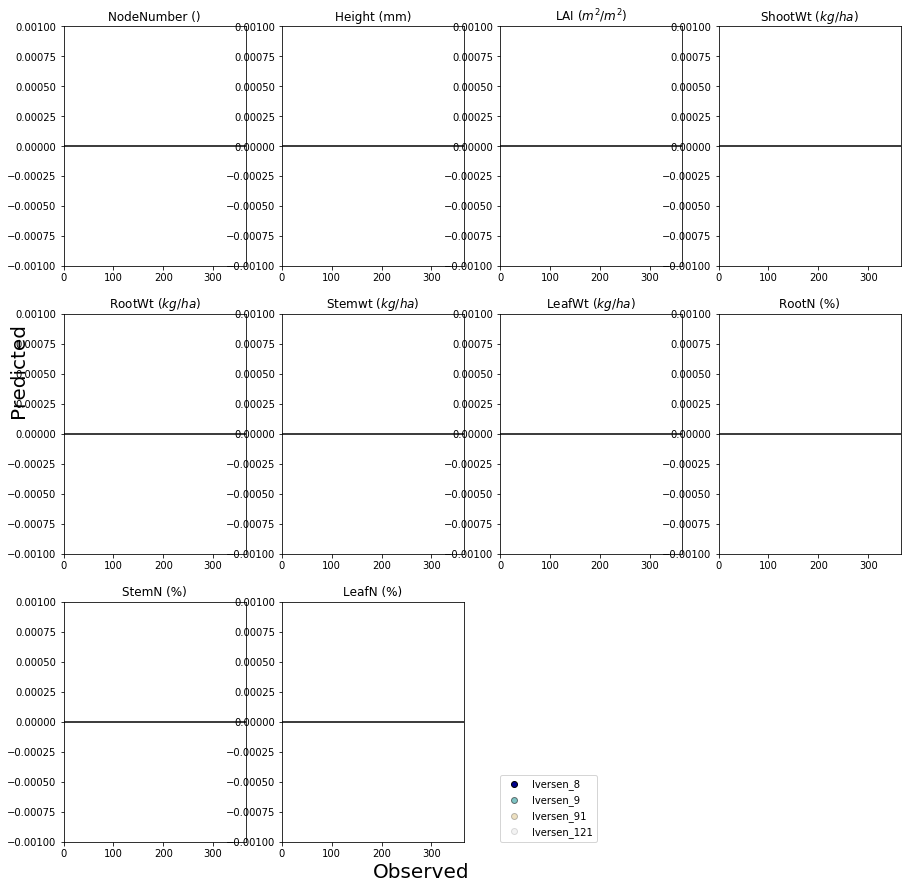

In [48]:
Graph = plt.figure(figsize=(15,15))
Variables = ['NodeNumber','Height','LAI','ShootWt','RootWt','StemWt','LeafWt','RootN','StemN','LeafN']
Units = ['','mm','$m^2/m^2$',
        '$kg/ha$','$kg/ha$','$kg/ha$','$kg/ha$','%','%','%']
Names = ['NodeNumber','Height','LAI','ShootWt','RootWt','Stemwt','LeafWt','RootN','StemN','LeafN']
Pos = 1
for Var in Variables:
    NaNFilter = np.isnan(PredictedObserved.loc[:,'Predicted.'+Var]) | np.isnan(PredictedObserved.loc[:,'Observed.'+Var])
    IaNFilter = ~NaNFilter
    Obs = PredictedObserved.loc[:,'Observed.'+Var].loc[IaNFilter]
    Pred = PredictedObserved.loc[:,'Predicted.'+Var].loc[IaNFilter]
    residual= Obs- Pred
    ax = Graph.add_subplot(3,4,Pos)
    MarPos = 0
    ColPos = 0
    alp=1.0
    lim=0.0
    for Exp in Includes:
        Sims = IDIndex.loc[(IDIndex.Experiment == Exp)&(IDIndex.SimulationName.isin(InculdeTreatments))].index.values
        obs = PredictedObserved.loc[IaNFilter,:].loc[PredictedObserved.loc[IaNFilter,:].SimulationID.isin(Sims),'Observed.'+Var].values
        pred=PredictedObserved.loc[IaNFilter,:].loc[PredictedObserved.loc[IaNFilter,:].SimulationID.isin(Sims),'Predicted.'+Var].values
        res = obs -pred 
        Days = PredictedObserved.loc[IaNFilter,:].loc[PredictedObserved.loc[IaNFilter,:].SimulationID.isin(Sims),'DSWS'].values
        plt.plot(Days,res,Markers[MarPos],color = Colors[ColPos], label=Exp,ms=3,alpha=alp, mec='k',mew=1)
        ColPos +=1
        alp*=0.5
        if ColPos== 18:
            ColPos=0
            MarPos += 1   
        try:
            lim = max( max (res.max(),res.min()*-1)*1.1, lim)
        except:
            fill=0
    plt.title(Names[Pos-1] + ' (' + Units[Pos-1] + ')')
    plt.ylim(-lim,lim)
    plt.xlim(0,365)
    plt.plot([0,365],[0,0],'-',color='k')
    #RegStats = MUte.MathUtilities.CalcRegressionStats(Var,Pred,Obs)
    #LabelText = MakeLabel(RegStats)
    #plt.text(0.05,0.78,LabelText,transform=ax.transAxes)
    Pos +=1
plt.text(0.5,-0.15,'Observed',fontsize=20,transform=ax.transAxes)
plt.text(-1.5,2.1,'Predicted',fontsize=20,rotation=90,transform=ax.transAxes)
plt.legend(loc = (1.2,0),ncol=1,numpoints=1,markerscale=2)

C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  ret = ax.set_ylim(*args, **kwargs)
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  ret = ax.set_ylim(*args, **kwargs)
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  ret = ax.set_ylim(*args, **kwargs)
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  ret = ax.set_ylim(*args, **kwargs)
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting

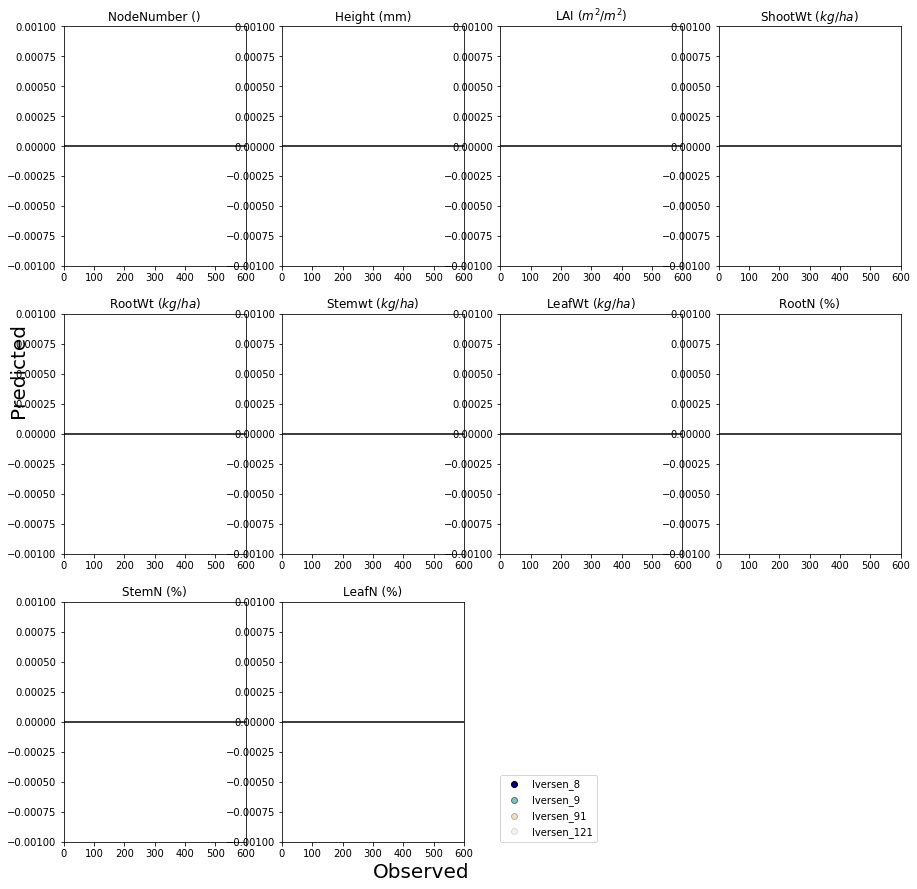

In [49]:
Graph = plt.figure(figsize=(15,15))
Variables = ['NodeNumber','Height','LAI','ShootWt','RootWt','StemWt','LeafWt','RootN','StemN','LeafN']
Units = ['','mm','$m^2/m^2$',
        '$kg/ha$','$kg/ha$','$kg/ha$','$kg/ha$','%','%','%']
Names = ['NodeNumber','Height','LAI','ShootWt','RootWt','Stemwt','LeafWt','RootN','StemN','LeafN']
Pos = 1
for Var in Variables:
    NaNFilter = np.isnan(PredictedObserved.loc[:,'Predicted.'+Var]) | np.isnan(PredictedObserved.loc[:,'Observed.'+Var])
    IaNFilter = ~NaNFilter
    Obs = PredictedObserved.loc[:,'Observed.'+Var].loc[IaNFilter]
    Pred = PredictedObserved.loc[:,'Predicted.'+Var].loc[IaNFilter]
    residual= Obs- Pred
    ax = Graph.add_subplot(3,4,Pos)
    MarPos = 0
    ColPos = 0
    alp=1.0
    lim=0.0
    for Exp in Includes:
        Sims = IDIndex.loc[(IDIndex.Experiment == Exp)&(IDIndex.SimulationName.isin(InculdeTreatments))].index.values
        obs = PredictedObserved.loc[IaNFilter,:].loc[PredictedObserved.loc[IaNFilter,:].SimulationID.isin(Sims),'Observed.'+Var].values
        pred=PredictedObserved.loc[IaNFilter,:].loc[PredictedObserved.loc[IaNFilter,:].SimulationID.isin(Sims),'Predicted.'+Var].values
        res = obs -pred 
        Days = PredictedObserved.loc[IaNFilter,:].loc[PredictedObserved.loc[IaNFilter,:].SimulationID.isin(Sims),'TTAC'].values
        plt.plot(Days,res,Markers[MarPos],color = Colors[ColPos], label=Exp, ms=3,alpha=alp, mec='k',mew=1)
        ColPos +=1
        alp*=0.5
        if ColPos== 18:
            ColPos=0
            MarPos += 1
        try:
            lim = max( max (res.max(),res.min()*-1)*1.1, lim)
        except:
            fill=0
    plt.title(Names[Pos-1] + ' (' + Units[Pos-1] + ')')
    plt.ylim(-lim,lim)
    plt.xlim(0,600)
    plt.plot([0,600],[0,0],'-',color='k')
    #RegStats = MUte.MathUtilities.CalcRegressionStats(Var,Pred,Obs)
    #LabelText = MakeLabel(RegStats)
    #plt.text(0.05,0.78,LabelText,transform=ax.transAxes)
    Pos +=1
plt.text(0.5,-0.15,'Observed',fontsize=20,transform=ax.transAxes)
plt.text(-1.5,2.1,'Predicted',fontsize=20,rotation=90,transform=ax.transAxes)
plt.legend(loc = (1.2,0),ncol=1,numpoints=1,markerscale=2)